In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx


In [6]:
n = 5000


In [10]:
t = np.linspace(0.0, 1.0/8.0, n)

In [12]:
y = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)

Text(0,0.5,'f(t)')

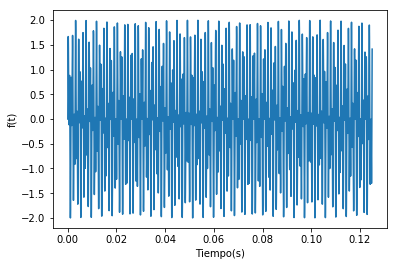

In [14]:
plt.plot(t,y)
plt.xlabel('Tiempo(s)')
plt.ylabel('f(t)')

In [15]:
yt = spfft.dct(y, norm='ortho')

In [16]:
freq=np.arange(0,5000)

Text(0,0.5,'DiscreteCosineTransform(f(t))')

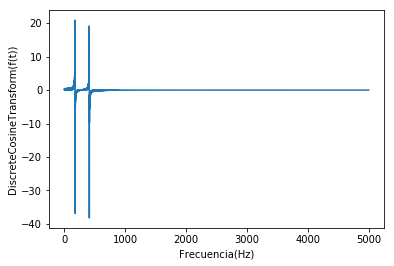

In [17]:
plt.plot(freq,yt)
plt.xlabel('Frecuencia(Hz)')
plt.ylabel('DiscreteCosineTransform(f(t))')

Text(0,0.5,'DiscreteCosineTransform(f(t))')

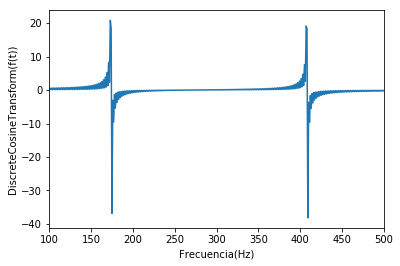

La escogencia de la base es importane para llevar a cabo el protocolo de compressed sensing. Es decir,
la señal debe ser sparse en la base escogida.

La idea es muestrear la señal aleatoriamente (y con sparsity) tal que 
$b=\phi f$

donde $b$ es son unos pequeños muestreos aleatorio de la señal original $f$. $\phi$ será un subconjunto de filas 
obtenidas aleatoriamente del operador identidad

Para comenzar el proceso de reconstrucción, la señal debe ser sampleada aleatoriamiente.

Ahora vamos a construir la matriz $A=\phi \psi$ de tamaño $m\times n$

In [22]:
m = 500 
ri = np.random.choice(n, m, replace=False) 
ri.sort() 
t2 = t[ri]
y2 = y[ri]

In [23]:
# Operador
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = A[ri]

#Optimización L1
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -2.205e-22  -0.000e+00  +3e+04  1e+00  1e-02  1e+00  3e+00    ---    ---    1  1  - |  -  - 
 1  +1.317e+02  +1.318e+02  +1e+04  9e-01  5e-03  5e-01  1e+00  0.6280  9e-02   1  1  1 |  0  0
 2  +1.722e+02  +1.724e+02  +9e+03  7e-01  4e-03  6e-01  9e-01  0.5089  6e-01   1  1  0 |  0  0
 3  +2.139e+02  +2.142e+02  +6e+03  5e-01  2e-03  5e-01  6e-01  0.6948  5e-01   1  0  0 |  0  0
 4  +2.548e+02  +2.549e+02  +3e+03  3e-01  1e-03  3e-01  3e-01  0.5851  2e-01   1  1  0 |  0  0
 5  +2.894e+02  +2.895e+02  +2e+03  1e-01  7e-04  1e-01  2e-01  0.5556  1e-01   1  0  1 |  0  0
 6  +3.144e+02  +3.144e+02  +8e+02  6e-02  3e-04  7e-02  8e-02  0.7386  3e-01   1  0  1 |  0  0
 7  +3.301e+02  +3.301e+02  +4e+02  3e-02  2e-04  4e-02  4e-02  0.6194  2e-01   1  1  1 |  0  0
 8  +3.416e+02  +3.417e+02  +2e+02  2e-02  8e-

In [24]:
#Reconstruir Señal

In [31]:
x = np.array(vx.value)
x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)

In [32]:
sig1=np.array(sig)

Text(0,0.5,'DiscreteCosineTransform(f(t))')

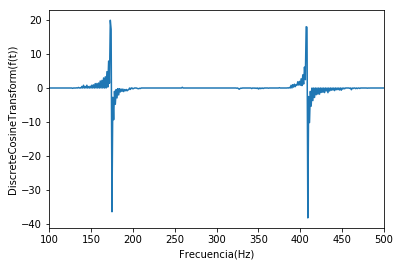

In [34]:
plt.plot(freq,x)

plt.xlabel('Frecuencia(Hz)')
plt.xlim(100,500)
plt.ylabel('DiscreteCosineTransform(f(t))')

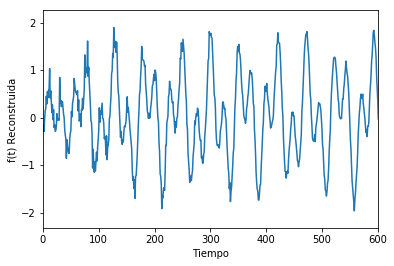

In [56]:
plt.plot(freq,sig1)
plt.xlabel('Tiempo')
plt.ylabel('f(t) Reconstruida')
plt.xlim(0,600)
plt.show()

Text(0,0.5,'f(t)')

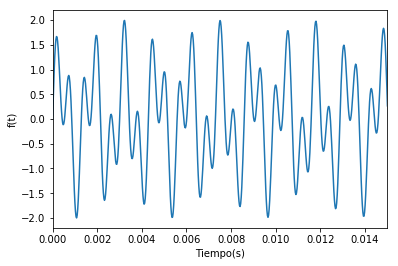

In [58]:
plt.plot(t,y)
plt.xlabel('Tiempo(s)')
plt.xlim(0,0.015)
plt.ylabel('f(t)')